In [1]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('datos_recombinacion_tab.txt',sep='\t')
print(data.shape)
data.head()

(1430, 213)


,pos,AAA,AAB,AAC,AAD,AAE,AAF,AAG,AAH,AAI,...,AIU,AIV,AIW,AIX,AIY,AIZ,AJA,AJB,AJC,AJD
0,5999,A,A,B,B,B,A,B,B,B,...,B,B,A,B,B,A,A,A,A,B
1,280663,A,A,B,B,B,A,B,B,B,...,B,B,A,B,B,A,A,A,A,B
2,281580,A,A,B,B,B,A,B,B,B,...,B,B,A,B,B,A,A,A,A,B
3,565760,A,A,B,B,B,A,B,B,B,...,B,B,A,B,B,A,A,A,A,B
4,565880,A,A,B,B,B,A,B,B,B,...,B,B,A,B,B,A,A,A,A,B


In [3]:
pd.unique(data[data.columns[1:]].values.ravel('K'))

array(['A', 'B', 'HA', 'HB', nan], dtype=object)

In [7]:
data[data.columns[1:]].apply(pd.value_counts).sum(axis=1)

A     151169.0
B     151519.0
HA        34.0
HB       202.0
dtype: float64

In [8]:
data = data.replace(['HA'],'A') # reemplazar HA -> A
data = data.replace(['HB'],'B') # reemplazar HB -> B

In [10]:
print(data.isna().sum().tolist()) #NaN values

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 224]


In [11]:
conteo = pd.DataFrame()
conteo['pos'] = data['pos']

for name in data.columns[1:]:
    temp = data[name].shift(1)
    temp[0] = data[name][0]
    conteo[name] = [0 if i==j else 1 for i,j in zip(data[name],temp)]

conteo['total'] = conteo.iloc[:, 1:].sum(axis=1)
conteo.head()

,pos,AAA,AAB,AAC,AAD,AAE,AAF,AAG,AAH,AAI,...,AIV,AIW,AIX,AIY,AIZ,AJA,AJB,AJC,AJD,total
0,5999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,280663,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,281580,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,565760,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,565880,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
conteo.total.unique()

array([  0,   1,   2,   5,   3,  52,  51,  12,  11,  44,  56,  78,  64,
        63,  97,  95,  77,  54,  48,  47,  43,  42,  49,  50,  53,  55,
        59,  61,  58,  57,  60,   4,  69,  71, 100,  62,  45])

In [13]:
print(conteo.shape)
print(conteo[conteo.total != 0].shape)
conteo = conteo[conteo.total != 0]

(1430, 214)
(863, 214)


In [15]:
test = pd.DataFrame()
pos = [8, 15,20, 23, 38, 41, 52, 65]
total = [1, 0 ,2, 4, 2, 0 ,7, 3] 

genome = 'AGTCGTAGCGTACGTGATATATATGGCGCGCGATCGCGCTCTCTACTATCTATCTACTACGACGGAGCGA'

total_all = [0 for _ in range(len(genome))]

for x,y in zip(pos,total):
        total_all[x-1] = y

# w = [1,20,30,45,50,70]
w = np.r_[0:30:20, 30:50:5, 50:len(genome):20, len(genome)]
print('w = ',w)
wrec=[]
for i in range(len(w)-1):
    print(total_all[w[i]:w[i+1]])
    wrec.append(sum(total_all[w[i]:w[i+1]]))

test2 = pd.DataFrame()
test2['Sw'] = w[:-1]
test2['Ew'] = w[1:]
test2['R_w'] = wrec
test2.head()

w =  [ 0 20 30 35 40 45 50 70]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
[0, 0, 4, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 2, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0]


,Sw,Ew,R_w
0,0,20,3
1,20,30,4
2,30,35,0
3,35,40,2
4,40,45,0


In [16]:
def read_sequence(fastafile):
    '''Returns the whole sequence of a fasta file in only one line'''
    with open(fastafile,'r') as f:
        f.readline()  
        seq = ''
        for line in f.readlines():
            seq += line.strip('\n').upper()
    return seq

In [17]:
pos = conteo.pos.tolist()
total = conteo.total.tolist()

genome = read_sequence('Osat_IR64_AGI_NSD_chrOK.id_chr01.fasta')

total_all = [0 for _ in range(len(genome))]

for x,y in zip(pos,total):
    total_all[x-1] = y

# w = np.r_[0, 100_000:1_000_000:100_000,
#              1_000_000:15_000_000:7_000_000,
#              15_000_000:30_000_000:3_000_000,
#              30_000_000:len(genome):10_000_000, len(genome)]

w = np.r_[0:len(genome):100_000, len(genome)]

wrec=[]
for i in tqdm(range(len(w)-1)):
    wrec.append(sum(total_all[w[i]:w[i+1]]))

recombination = pd.DataFrame()
recombination['Sw'] = w[:-1]
recombination['Ew'] = w[1:]
recombination['R_w'] = wrec
recombination.head(30)

100%|██████████| 444/444 [00:00<00:00, 1263.29it/s]


,Sw,Ew,R_w
0,0,100000,0
1,100000,200000,0
2,200000,300000,1
3,300000,400000,0
4,400000,500000,0
5,500000,600000,2
6,600000,700000,4
7,700000,800000,0
8,800000,900000,0
9,900000,1000000,0


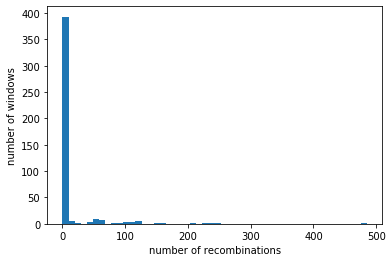

In [18]:
# histogram with all dataframe
plt.hist(recombination.R_w.tolist(),bins=50)
plt.xlabel('number of recombinations')
plt.ylabel('number of windows')
plt.show()

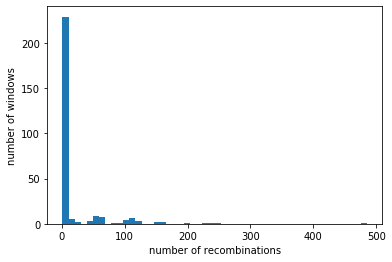

In [19]:
# histogram without zero recombination values
new_recom = recombination[recombination.R_w != 0]
plt.hist(new_recom.R_w.tolist(),bins=50)
plt.xlabel('number of recombinations')
plt.ylabel('number of windows')
plt.show()

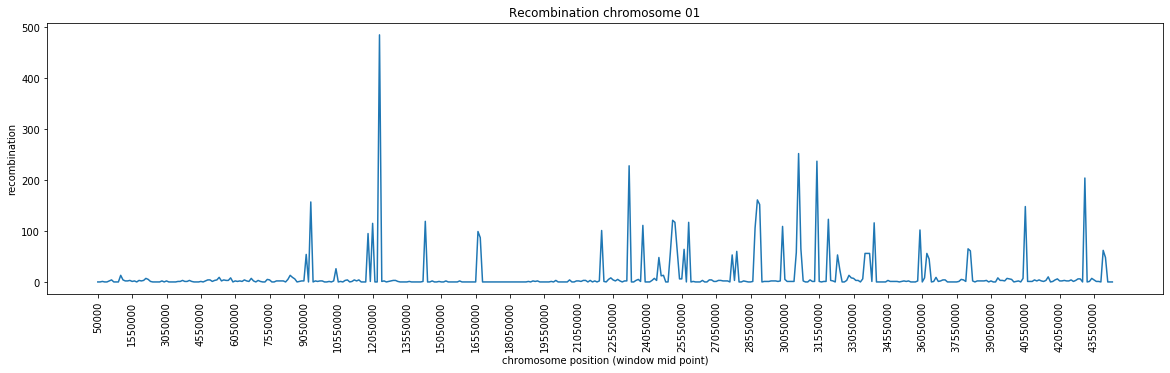

In [24]:
# plt.hist(recombination.R_w.tolist())
plt.figure(figsize=(20,5))
plt.plot(recombination.R_w)
real_labels = [int((e+s)/2) for e,s in zip(recombination.Ew,recombination.Sw)]
label_pos = np.arange(0, len(real_labels), step=15)
new_label = [real_labels[i] for i in label_pos]
plt.xticks(label_pos)  # Set label locations.
plt.xticks(label_pos, new_label, rotation='vertical')  # Set text labels.
plt.xlabel('chromosome position (window mid point)')
plt.ylabel('recombination')
plt.title('Recombination chromosome 01')
plt.show()